<img src="Images/PoweredTechGirlz.png" width="15%" align="right" hpsace="50">

# Activity 3: Fun with Machine Learning 

This exercise uses data from the <a href="https://www.cs.toronto.edu/~kriz/cifar.html">CIFAR-10</a> dataset.

# Cat classifier

<img src="Images/cat.jpg" width="10%" align="right" hpsace="10">

In this exercise, we will use what we just leaned to create a cat classifier. We have prepared a dataset of 500 images and in this exercise we will teach a machine learning algorithm to distinguish which ones are images of cats and which ones aren't.

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from collections import Counter
from Helpers.helpers import *

%matplotlib inline
import matplotlib as mpl
mpl.rcParams['lines.markersize'] = 12

## Reading training data

First we need to read the *labeled* data we want to learn from. In this example we used *supervised machine learning*, so we need to have a data set containing inputs as well as the correct label. Let's read the data and have a look. Hit `shitf+enter` in the next cell.

label:  cat


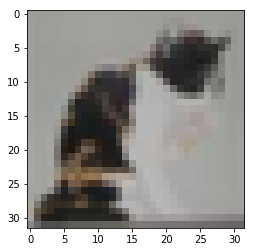

In [2]:
# Reading the data
data, labels = load_cat_data()

# We can now look at the data we loaded, for example
plot_image(data, labels, 0)

Let's look at an example of a non-cat image

label:  not cat


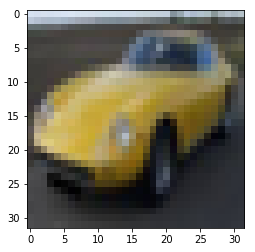

In [3]:
plot_image(data, labels, 4)

Let us check how many entries for cats and non-cats we have. What would be good or bad numbers for the classifier to work?

In [4]:
# Count how many entries of each type we have in the list 'labels'
Counter(labels).most_common()

[('cat', 250), ('not cat', 250)]

The images are actually stores as lists of numbers, where each number represents the color of one pixel in the image.

In [5]:
print(data[0])

[158 156 156 ..., 103 102 103]


These numbers we call **inputs** as they later are the inputs we used to classify an unknown picture. We also have a list of labels called `labels`. So in this data set we *know* the corresponding label for each image.

Next we need to split our dataset into data that will be used for training the model and data that will be used for testing how well it does. The command below selects 20% of the data at random and sets them aside as test data set. We will use it later to check our model.

In [6]:
# Preparing data and create training and test inputs and labels
inputs_train, inputs_test, labels_train, labels_test = \
       model_selection.train_test_split(data, labels, test_size=0.2, random_state=0)

## Training

Now we are ready to train. As you heard already, there are many different traing models. We specify `KNeighborsClassifier` as our classifier and then simple call `fit` using our inputs and label arrays. Again just run the cell by enetring `shift+enter`.

In [7]:
# Selecting the classifier we want to use
knn = KNeighborsClassifier(n_neighbors=5)

# Learning based on inputs and labels from our dataset
knn.fit(inputs_train, labels_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

## Check against test data

Now we use the test data and see how many fruit were classified correctly using our model. The value is the percentage of test data classified correctly, so 100% would indicate all images were classified correctly.

In [8]:
# Predict what the classes are based on the testing data
predictions = knn.predict(inputs_test)

# Print the score on the testing data
print("KNN Testing Set Score:")
print(accuracy_score(labels_test, predictions)*100)

KNN Testing Set Score:
63.0


## Now use the trained network to make predictions

So now we have our trained network. Let us explore how well it works, by making predictions. You can pick an image from the test set, visualize it, and see if the network correctly predicts whether your selected image is a cat or not.

label:  cat


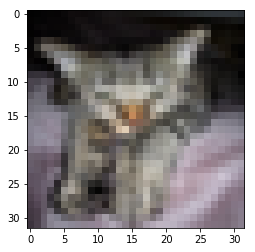

Prediction: cat


In [9]:
# Specify which image you want to show
image_id = 6

# Visualize the image
plot_image(inputs_test, labels_test, image_id)

# Use the computer to predict which kind of fruit this might be and print it
print('Prediction:', knn.predict([inputs_test[image_id]])[0])

Our trained network uses 5 nearest neighbours of the image to assign a label to a new image. What if you change this number? Will the classifier do better or worse? Free free to experiment with the number and see if you can improve the network!

## Have fun